In [2]:
!pip install pyod
from scipy import stats
import pandas as pd
import numpy as np
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from scipy import stats
from pyod.models.iforest import IForest
from scipy.stats import median_abs_deviation

warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=f986808690f80b54a53e216b923beec58881df06242d2b3d77d4b14f93ca0287
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/capstone project

/content/drive/MyDrive/capstone project


In [5]:
df = pd.read_csv('TON_IOT_pre.unknown')

In [6]:
df.shape

(1210789, 20)

In [7]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210789 entries, 0 to 1210788
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1210789 non-null  int64  
 1   L4_DST_PORT                 1210789 non-null  int64  
 2   PROTOCOL                    1210789 non-null  int64  
 3   L7_PROTO                    1210789 non-null  float64
 4   IN_BYTES                    1210789 non-null  int64  
 5   OUT_BYTES                   1210789 non-null  int64  
 6   IN_PKTS                     1210789 non-null  int64  
 7   OUT_PKTS                    1210789 non-null  int64  
 8   TCP_FLAGS                   1210789 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  1210789 non-null  int64  
 10  Label                       1210789 non-null  int64  
 11  Attack                      1210789 non-null  object 
 12  IPV4_SRC_ADDR_0             1210789 non-null  int64  
 1

In [9]:
max_size = df['Label'].value_counts().max()
print(max_size)

998115


In [10]:
lst = [df]
for class_index, group in df.groupby('Label'):
    lst.append(group.sample(max_size-len(group), replace=True))
over_sampled= pd.concat(lst)

In [11]:
over_sampled.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [12]:
over_sampled.shape

(1996230, 20)

<Axes: title={'center': 'attack vs normal'}>

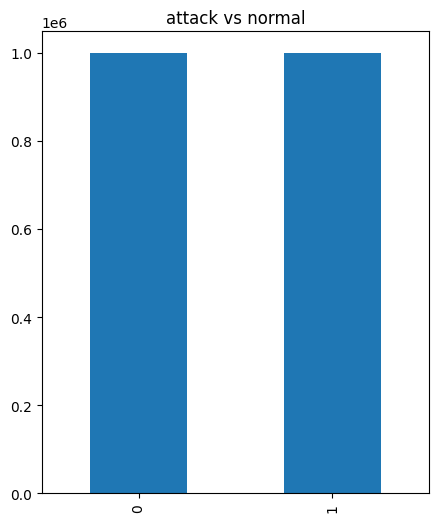

In [13]:
over_sampled['Label'].value_counts().plot(kind='bar',figsize=(5,6),title='attack vs normal') #0 bening ,1 attack

In [14]:
over_sampled.to_csv('over_sampled_data.csv')